# Likelihood contourf with the FGD with the light minimal model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from Likelihood import LEff
from dark_nus_utils import load_datasets
from const import alphaQED
from parameters_dict import mass_material

In [3]:
hierarchy = 'light'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)
selection = 'carbon'
mass_ratio = 1848.6 * 1e-9 * 184**2  * 15 / mass_material[selection]
pot_ratio = 11.92/20

In [4]:
save_folder = f'../fig/6_visualization/{hierarchy}_{D_or_M}'
!mkdir -p $save_folder

In [5]:
levels = {0.68: -2.3/2,
          0.9: -4.61/2,
          0.95: -5.99/2}

In [6]:
my_exp_analysis = load_datasets(hierarchy, D_or_M, timeit=True, direct_load_objects=True)[f'{hierarchy}_{D_or_M}']

light majorana
Wall time: 0.9062819480895996 s, CPU time: 0.8947360499999997


In [9]:
smearing_folder = 'smearing_matrices/'
smearing_p = np.load(smearing_folder + 'Momentum_matrix.npy')
p_binning_true = np.load(smearing_folder + 'Momentum_binning_true.npy')/1000
p_binning_reco = np.load(smearing_folder + 'Momentum_binning_reco.npy')/1000
smearing_theta = np.load(smearing_folder + 'Angle_matrix.npy')
theta_binning_true = np.load(smearing_folder + 'Angle_binning_true.npy')
theta_binning_reco = np.load(smearing_folder + 'Angle_binning_reco.npy')
my_exp_analysis.setResolution(smearing_p, p_binning_true, p_binning_reco, 
                              smearing_theta, theta_binning_true, theta_binning_reco)

IndexError: index 100 is out of bounds for axis 0 with size 100

In [11]:
smearing_folder = 'smearing_matrices/'
smearing_p = np.load(smearing_folder + 'Momentum_matrix.npy')
p_binning_true = np.load(smearing_folder + 'Momentum_binning_true.npy')/1000
p_binning_reco = np.load(smearing_folder + 'Momentum_binning_reco.npy')/1000
smearing_theta = np.load(smearing_folder + 'Angle_matrix.npy')
theta_binning_true = np.load(smearing_folder + 'Angle_binning_true.npy')
theta_binning_reco = np.load(smearing_folder + 'Angle_binning_reco.npy')
my_exp_analysis.setResolution(smearing_p, p_binning_true, p_binning_reco, 
                              smearing_theta, theta_binning_true, theta_binning_reco)

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


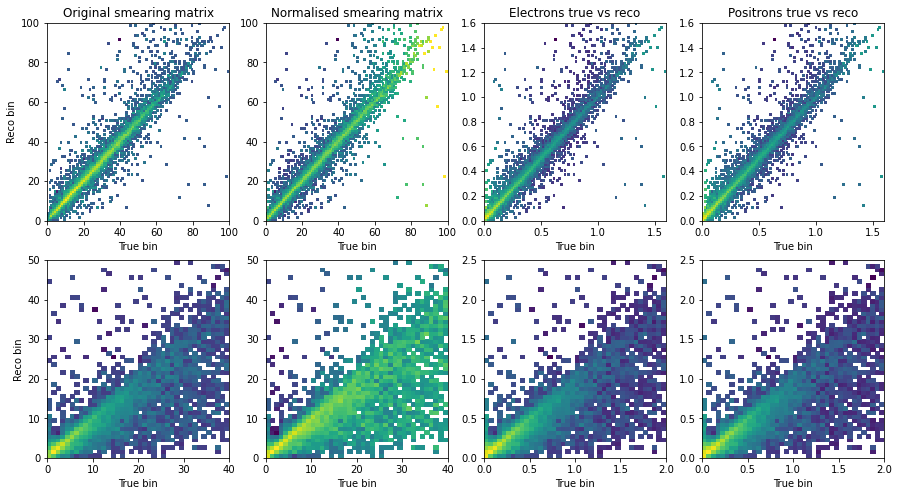

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((smearing_theta.T/smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(theta_binning_true, theta_binning_reco), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(theta_binning_true, theta_binning_reco), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((smearing_p.T/smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(p_binning_true, p_binning_reco), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(p_binning_true, p_binning_reco), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

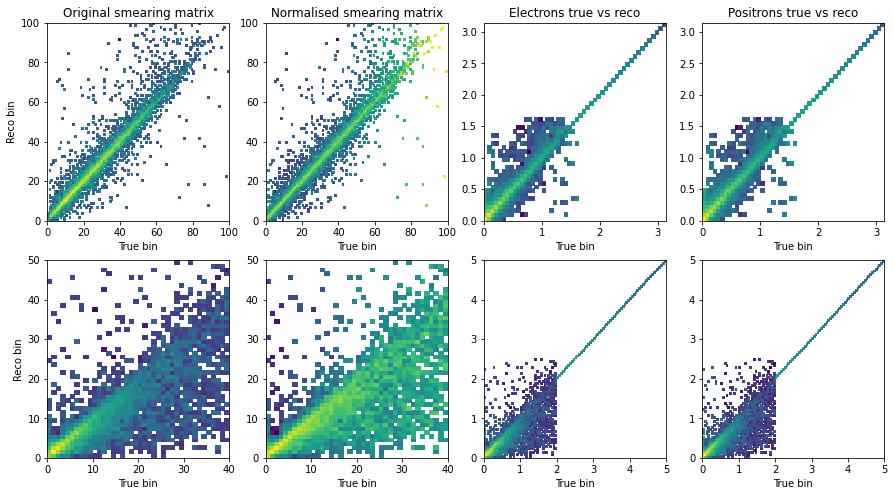

In [26]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((smearing_theta.T/smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((smearing_p.T/smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

out_m = axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

out_p = axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

In [28]:
out_m[0]/out_p[0]

<ipython-input-28-dd529f769ac3>:1: RuntimeWarning: invalid value encountered in true_divide
  out_m[0]/out_p[0]


array([[1.0017803 , 0.99887263, 1.00870762, ...,        nan,        nan,
               nan],
       [0.99356555, 0.99879129, 1.00476708, ...,        nan,        nan,
               nan],
       [0.9991874 , 1.00151578, 1.0018594 , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 1.00235849,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.94322132,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        1.03534031]])

In [13]:
emp_true_opening_cos_angle = np.sin(my_exp_analysis.df_base['em_beam_theta'])*np.cos(my_exp_analysis.df_base['em_beam_phi']) *\
                                np.sin(my_exp_analysis.df_base['ep_beam_theta'])*np.cos(my_exp_analysis.df_base['ep_beam_phi']) +\
                                np.sin(my_exp_analysis.df_base['em_beam_theta'])*np.sin(my_exp_analysis.df_base['em_beam_phi']) *\
                                np.sin(my_exp_analysis.df_base['ep_beam_theta'])*np.sin(my_exp_analysis.df_base['ep_beam_phi']) +\
                                np.cos(my_exp_analysis.df_base['em_beam_theta'])*np.cos(my_exp_analysis.df_base['ep_beam_theta'])

ee_mass_true = np.sqrt(2*my_exp_analysis.df_base['em_energy']*my_exp_analysis.df_base['ep_energy']*\
                                        (1 - emp_true_opening_cos_angle))

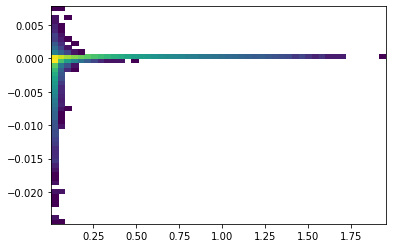

In [20]:
# plt.hist2d(my_exp_analysis.df_base['ee_mass'], ee_mass_true, bins=(50, 50), norm=LogNorm());
plt.hist2d(my_exp_analysis.df_base['ee_mass'], ee_mass_true - my_exp_analysis.df_base['ee_mass'], bins=(50, 50), norm=LogNorm());

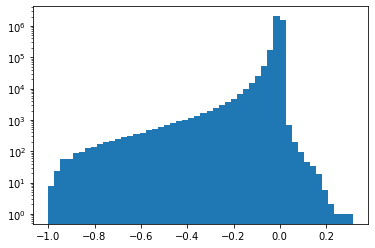

In [21]:
plt.hist(ee_mass_true/my_exp_analysis.df_base['ee_mass'] - 1, bins=(50))
plt.yscale('log')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              bins=(50, 50), range=((0, 1.5), (0, 1.5)), norm=LogNorm());
axs[0].set_title('Zoomed version')
axs[0].set_xlabel('True invariant mass [GeV]')
axs[0].set_ylabel('Reco invariant mass [GeV]')
axs[1].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              range=((0, 2), (0, 4)), bins=(50, 50), norm=LogNorm());
axs[1].set_title('Total version')
axs[1].set_xlabel('True invariant mass [GeV]')
axs[1].set_ylabel('Reco invariant mass [GeV]')

In [ ]:
digitized_data = np.loadtxt('../digitized/nueCCQE_ND280_2020/FHC_invmass_data.dat')
digitized_data[:, 0] = np.linspace(0.005, 0.195, 20)
digitized_data[:, 1] = digitized_data[:, 1].astype(int)
# digitized_data, epsilon = np.meshgrid(digitized_data[:, 1], epsilon_for_grid)
digitized_MCtot = np.loadtxt('../digitized/nueCCQE_ND280_2020/FHC_invmass_MCtot.dat')
digitized_MCtot[:, 0] = np.linspace(0.005, 0.195, 20)
# digitized_MCtot, epsilon = np.meshgrid(digitized_MCtot[:, 1], epsilon_for_grid)

In [ ]:
m4 = 0.1
mz = 0.03

In [ ]:
m4mz_weights = my_exp_analysis.kde_on_a_point(my_exp_analysis.df_base.query(selection), this_m4mz=(m4, mz))

In [ ]:
plt.bar(digitized_data[:, 0], height=digitized_data[:, 1], 
        width=digitized_data[1, 0]-digitized_data[0, 0],
        alpha=0.5, label='data')
plt.step(digitized_MCtot[:, 0], digitized_MCtot[:, 1], where='mid', color='C1', label='total MC')

plt.hist(my_exp_analysis.df_base.query(selection)['ee_mass'], bins=np.linspace(0.00, 0.2, 21), weights=m4mz_weights,
         color='C2', histtype='step', label="true level")
plt.hist(my_exp_analysis.df_base.query(selection)['ee_mass_reco'], bins=np.linspace(0.00, 0.2, 21), weights=m4mz_weights,
         color='C3', histtype='step', label="reco level")

plt.legend(frameon=False)

In [ ]:
my_exp_analysis.df_base.query(selection)['ee_mass']

In [ ]:
my_exp_analysis.df_base.query(selection)['ee_mass_reco']

In [ ]:
from ctau_utils import ctau_light
def light_simplified_posterior(m4=0.1, mz=0.03, Umu4_2=8e-9, Ud4_2=0.01, alpha_d=0.25, epsilon=2.1e-2, 
                               additional_factor=mass_ratio*pot_ratio, n_observed=0, n_predicted_sm=0):
    Vmu4_alpha_epsilon2 = alpha_d * Umu4_2 * alphaQED * epsilon**2
    Valpha4 = alpha_d * Ud4_2
    ctau = ctau_light(m4, 
                      mz, 
                      Valpha4, 
                      D_or_M)
    this_mu = Vmu4_alpha_epsilon2/my_exp_analysis.Vmu4_alpha_epsilon2
    mu, sigma2 = my_exp_analysis.kde_n_events(df=my_exp_analysis.df_base.query(selection),
                                                     m4mz=(m4, mz),
                                                     ctau=None,
                                                     mu=this_mu,
                                                     distance=distance,
                                                     smoothing=smoothing_pars)
    mu *= additional_factor
    sigma2 *= additional_factor**2
    return LEff(n_observed, n_predicted_sm+mu, sigma2), mu, sigma2, ctau

In [ ]:
light_simplified_posterior_v = np.vectorize(light_simplified_posterior)

## Dark photon plots

In [ ]:
# setting
m4_s = [0.1, 0.25, 0.42]
mz_for_grid = np.linspace(0.005, 0.095, 10)
epsilon_for_grid = np.geomspace(1e-5, 1e-1, 15)
mz, epsilon = np.meshgrid(mz_for_grid, epsilon_for_grid)

In [ ]:
digitized_data = np.loadtxt('../digitized/nueCCQE_ND280_2020/FHC_invmass_data.dat')
digitized_data[:, 0] = np.linspace(0.005, 0.195, 20)
digitized_data[:, 1] = digitized_data[:, 1].astype(int)
digitized_data, epsilon = np.meshgrid(digitized_data[:, 1], epsilon_for_grid)
digitized_MCtot = np.loadtxt('../digitized/nueCCQE_ND280_2020/FHC_invmass_MCtot.dat')
digitized_MCtot[:, 0] = np.linspace(0.005, 0.195, 20)
digitized_MCtot, epsilon = np.meshgrid(digitized_MCtot[:, 1], epsilon_for_grid)

In [ ]:
# calculation
dark_photons_constraints = {}
for m4 in m4_s:
    dark_photons_constraints[m4] = light_simplified_posterior_v(m4=m4, mz=mz, epsilon=epsilon[:, :10],
                                                                  n_observed=digitized_MCtot.astype(int)[:, :10], 
                                                                  n_predicted_sm=digitized_MCtot[:, :10])

In [ ]:
# plot
linestyles = ['-', '--', 'dotted']
contours = {}
for m4, linestyle in zip(m4_s, linestyles):
    plt.contourf(mz, epsilon[:, :10], dark_photons_constraints[m4][0], 
                                  levels=[-np.inf, dark_photons_constraints[m4][0].max() + levels[0.9]], 
                                colors=['orange'], alpha=0.15)
    contours[m4] = plt.contour(mz, epsilon[:, :10], dark_photons_constraints[m4][0], 
                                  levels=[-np.inf, dark_photons_constraints[m4][0].max() + levels[0.9]], 
                               colors=['chocolate'], linestyles=[linestyle], alpha=0.5)
plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
           [f'$m_4$ = {m4} GeV' for m4 in contours.keys()],
           frameon=False,
           loc='lower right')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')
plt.title('BP-L2, constraint with perfect detector')

In [ ]:
m4 = 0.42

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axs[0][0].loglog()

pcm = axs[0][0].pcolormesh(mz, epsilon, -dark_photons_constraints[m4][0], norm=LogNorm())
fig.colorbar(pcm, ax=axs[0][0])
axs[0][0].set_title(r'- $\log$(likelihood)')

pcm = axs[0][1].pcolormesh(mz, epsilon, dark_photons_constraints[m4][1], norm=LogNorm())
fig.colorbar(pcm, ax=axs[0][1])
axs[0][1].set_title(r'$\mu$')

pcm = axs[0][2].pcolormesh(mz, epsilon, dark_photons_constraints[m4][3], norm=LogNorm())
fig.colorbar(pcm, ax=axs[0][2])
axs[0][2].set_title(r'c$\tau$ [cm]')

pcm = axs[1][0].pcolormesh(mz, epsilon, np.sqrt(dark_photons_constraints[m4][2])/dark_photons_constraints[m4][1], norm=LogNorm())
fig.colorbar(pcm, ax=axs[1][0])
axs[1][0].set_title(r'$\sigma / \mu$')

# pcm = axs[1][1].pcolormesh(mz, epsilon, dark_photons_constraints[m4][4], norm=LogNorm())
# fig.colorbar(pcm, ax=axs[1][1])
# axs[1][1].set_title(r'N passing c$\tau$')

# pcm = axs[1][2].pcolormesh(mz, epsilon, dark_photons_constraints[m4][5], norm=LogNorm())
# fig.colorbar(pcm, ax=axs[1][2])
# axs[1][2].set_title(r'N used for the KDE')

for axes in axs:
    for ax in axes:
        ax.set_xlabel(r'$m_z$ [GeV]')
        ax.set_ylabel(r'$\epsilon$')
        ax.contour(mz, epsilon, dark_photons_constraints[m4][0], 
                   levels=[dark_photons_constraints[m4][0].max() + levels[0.9]], colors=['red'])
        
fig.savefig(save_folder + 'dark_photon_space_study_precision.png', bbox_inches='tight', dpi=250)
fig.savefig(save_folder + 'dark_photon_space_study_precision.pdf')